In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [3]:
data = pd.read_csv('Titanic.csv')

In [4]:
def clean_data(data, attributes = None):
    cleaned_data = data.drop_duplicates()
    if not attributes is None:
        cleaned_data= cleaned_data[attributes]
    return cleaned_data
    

In [5]:
select = ["Age",
          "No of Siblings or Spouses on Board",
          "No of Parents or Children on Board",
          "Passenger Class",
          "Passenger Fare",
          "Port of Embarkation",
          "Sex",
          "Survived"]
cleaned_data = clean_data(data, select)

In [6]:
#Fill missing Age values
average_age = np.mean(cleaned_data["Age"].dropna()) # ignoring any missing values (NaN) using dropna()

# Replace all missing Age values with the calculated average age.
cleaned_data.loc[:, "Age"] = cleaned_data["Age"].fillna(average_age) 

print("Average Age (used to fill missing):", round(average_age, 2))

indices = data[data["Age"].isna()].index #get indices of the missing values from the original data
print(cleaned_data["Age"][indices]) #print only the values of those inidices

# Find the highest passenger fare (maximum value) in the dataset.
max_fare = np.max(cleaned_data["Passenger Fare"])

# Find the lowest passenger fare (minimum value) in the dataset.
min_fare = np.min(cleaned_data["Passenger Fare"])

# Find the average passenger fare (mean value) in the dataset.
mean_fare = np.mean(cleaned_data["Passenger Fare"])

print("\nFare stats → max:", max_fare, " min:", min_fare, " avg:", round(mean_fare, 2))

Average Age (used to fill missing): 29.88
15      29.881135
37      29.881135
40      29.881135
46      29.881135
59      29.881135
          ...    
1293    29.881135
1297    29.881135
1302    29.881135
1303    29.881135
1305    29.881135
Name: Age, Length: 263, dtype: float64

Fare stats → max: 512.3292  min: 0.0  avg: 33.3


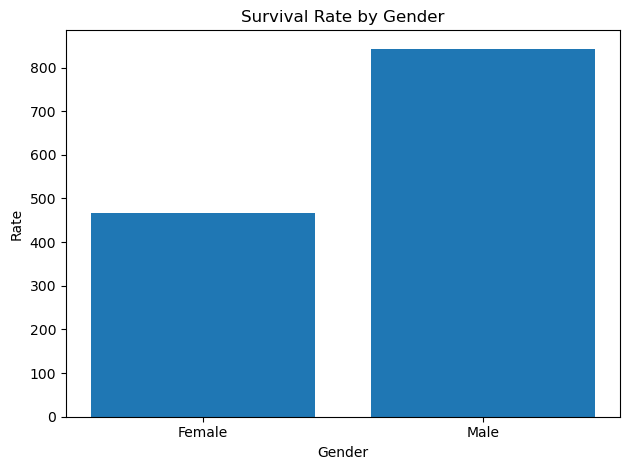

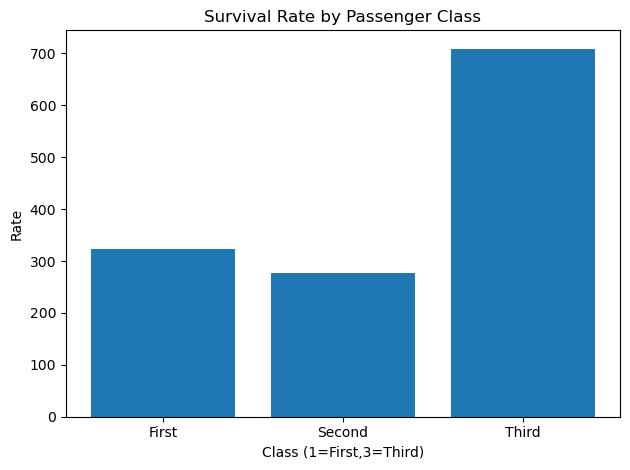

In [24]:
# Survival by gender

# Group the dataset by the Sex column and calculate the mean of the Survived values.
survival_by_gender = cleaned_data.groupby("Sex")["Survived"].size()
plt.figure()
plt.bar(survival_by_gender.index, survival_by_gender.values)

# Add a descriptive title and axis labels to explain what the chart shows.
plt.title("Survival Rate by Gender")
plt.xlabel("Gender"); plt.ylabel("Rate")

# Adjusts spacing automatically so labels and titles don’t overlap.
plt.tight_layout(); plt.show()


# Survival by class
cls_col = "Passenger Class"  # Define which column name represents passenger class.

# Group the dataset by passenger class and calculate the average survival rate per class.
survival_by_class = cleaned_data.groupby(cls_col)["Survived"].size()
plt.figure()

# Plot the survival rate by class as a bar chart.
plt.bar(survival_by_class.index, survival_by_class.values)

# Add a title and labels to clarify what the chart represents.
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Class (1=First,3=Third)"); plt.ylabel("Rate")

# Fix layout spacing for readability.
plt.tight_layout(); plt.show()
